**NAMA  : ENDAH ANISAH FAUZIYAH** <br>
**KELAS : TIF PAGI B** <br>
**NIM   : 211351050** <br>

<br>

**MODEL UAS MACHINE LEARNING (KNN)**

# Import Data Dari Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"povbyenn","key":"caf17c591727b3a3d899f7fc4ea0d469"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d wenruliu/adult-income-dataset

  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 56.3MB/s]


In [4]:
!mkdir adult-income-dataset
!unzip adult-income-dataset.zip -d adult-income-dataset
!ls adult-income-dataset

Archive:  adult-income-dataset.zip
  inflating: adult-income-dataset/adult.csv  
adult.csv


# Import Library Yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

import itertools
import random
import statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Discovery

In [6]:
df = pd.read_csv('adult-income-dataset/adult.csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df = df.drop(['capital-gain', 'capital-loss'], axis=1)

In [10]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  hours-per-week  \
0  Machine-op-inspct    Own-child  Black    Male              40   
1    Farming-fishing      Husband  White    Male              50   
2    Protective-serv      Husband  White    Male              40   
3  Machine-op-inspct      Husband  Black    Male              40   
4                  ?    Own-child  White  Female              30   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States   >50K  
3  Uni

In [11]:
numerical = []
catgols = []

for col in df.columns:
  if df[col].dtype=="floa64t":
    numerical.append(col)
  else:
    catgols.append(col)

for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
numerical

[]

In [13]:
catgols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'hours-per-week',
 'native-country',
 'income']

In [14]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [15]:
ind_col = [col for col in df.columns if col != 'income']
dep_col = 'income'

In [16]:
df[dep_col].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# EDA

<Axes: >

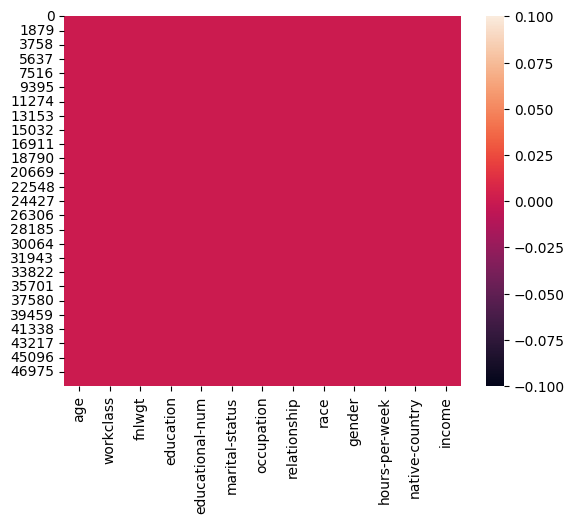

In [17]:
sns.heatmap(df.isnull())

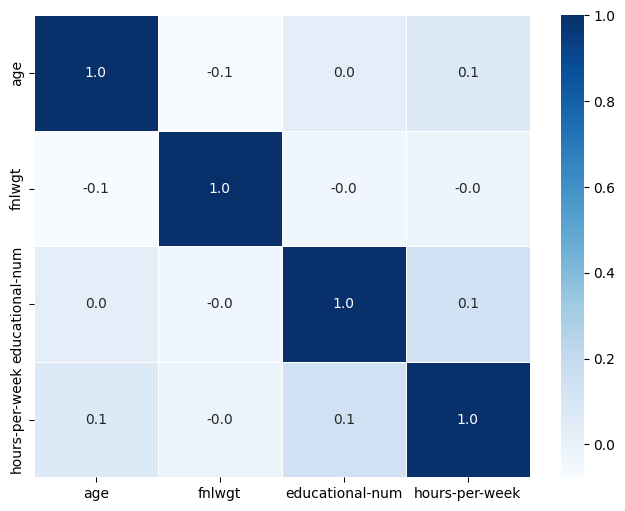

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

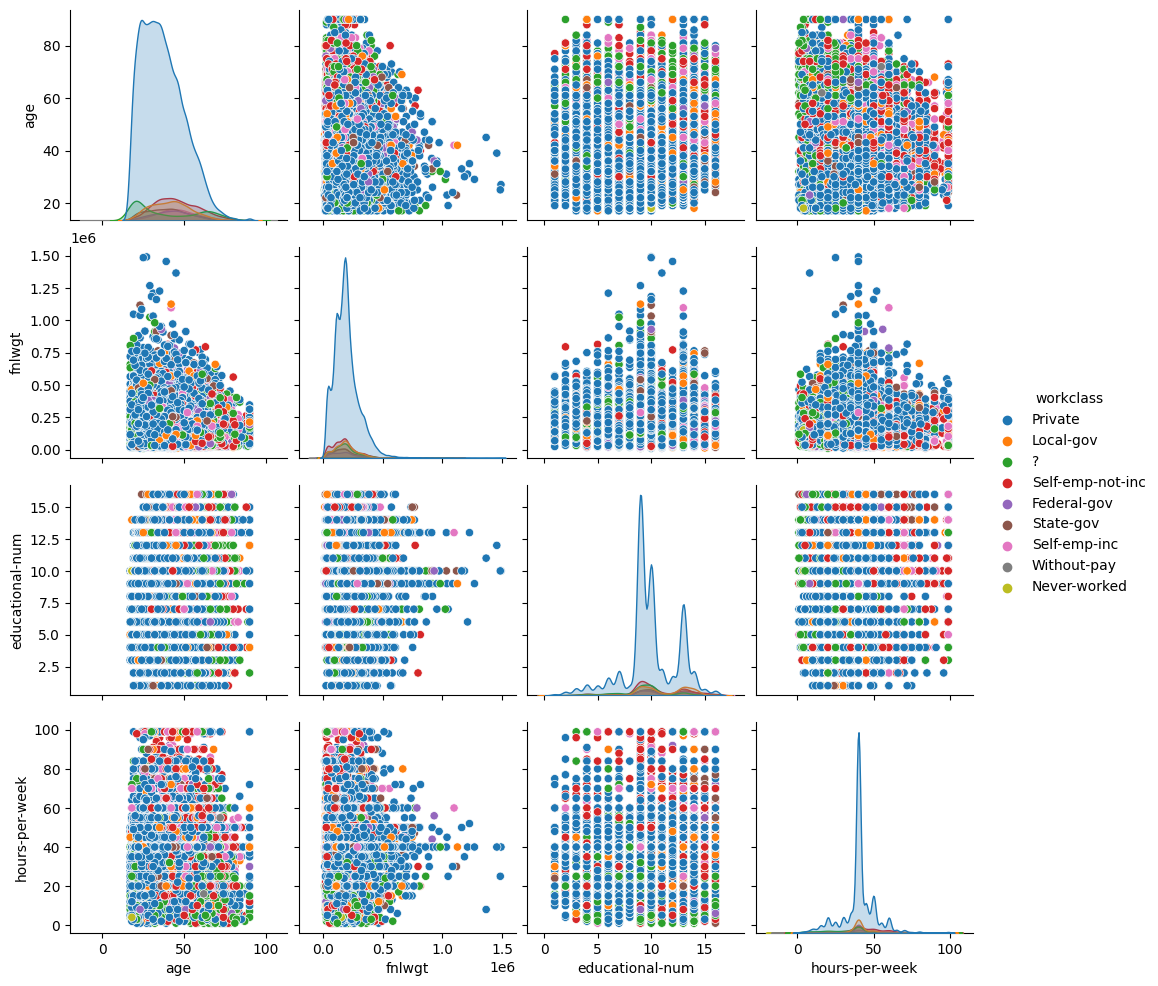

In [19]:
# Pair Plot below helps us understand the relationship between all the features.
sns.pairplot(df,hue='workclass')
plt.show()

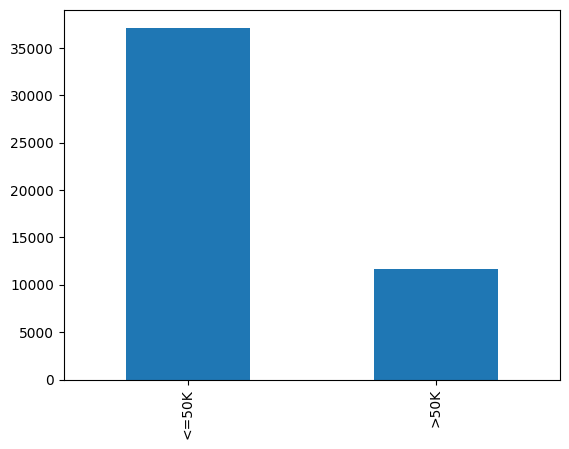

In [20]:
df.income.value_counts().plot(kind='bar')
plt.show()

<Figure size 1010x606 with 0 Axes>

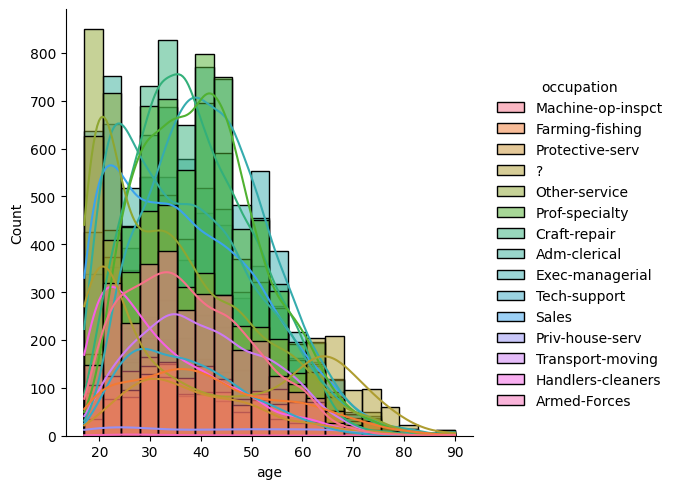

In [21]:
plt.figure(figsize=(10,6),dpi=101)
ax=sns.displot(data=df,x='age',bins=20,kde=True,hue='occupation')

<Figure size 1010x606 with 0 Axes>

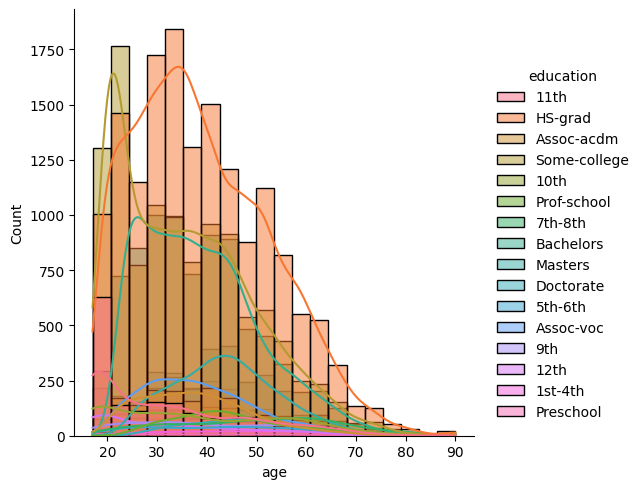

In [22]:
plt.figure(figsize=(10,6),dpi=101)
ax=sns.displot(data=df,x='age',bins=20,kde=True,hue='education')

# Data Preprocessing

In [23]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [24]:
le = LabelEncoder()

for col in catgols:
  df[col] = le.fit_transform(df[col])

In [25]:
df['income'] = le.fit_transform(df['income'])

In [26]:
x = df[ind_col] #features
y = df[dep_col] #label

In [27]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,8,4,19329,1,6,4,7,3,2,1,39,39,0
1,21,4,4212,11,8,2,5,0,4,1,49,39,0
2,11,2,25340,7,11,2,11,0,4,1,39,39,1
3,27,4,11201,15,9,2,7,0,2,1,39,39,1
4,1,0,5411,15,9,4,0,3,4,0,29,39,0


In [28]:
df.to_csv('adult-income.csv')

In [29]:
features = ['education','occupation','native-country','workclass','race','marital-status','gender','relationship']
x = df[features]
y = df['income']
x.shape, y.shape

((48842, 8), (48842,))

In [30]:
print(x)
print(y)

       education  occupation  native-country  workclass  race  marital-status  \
0              1           7              39          4     2               4   
1             11           5              39          4     4               2   
2              7          11              39          2     4               2   
3             15           7              39          4     2               2   
4             15           0              39          0     4               4   
...          ...         ...             ...        ...   ...             ...   
48837          7          13              39          4     4               2   
48838         11           7              39          4     4               2   
48839         11           1              39          4     4               6   
48840         11           1              39          4     4               4   
48841         11           4              39          5     4               2   

       gender  relationship

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [32]:
print(x.shape, X_train.shape, X_test.shape)

(48842, 8) (39073, 8) (9769, 8)


In [33]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [34]:
print(X_train)
print(X_test)

[[ 0.18257262 -0.37571188  0.28909261 ...  0.91437747  0.70790773
   1.59292728]
 [ 0.18257262  1.28092737  0.28909261 ...  0.91437747 -1.41261348
   1.59292728]
 [-2.1368139   0.33427637  0.28909261 ... -1.7351439  -1.41261348
   1.59292728]
 ...
 [-1.36368506  1.75425288  0.28909261 ... -0.41038321  0.70790773
  -0.90258002]
 [ 0.18257262  1.51759012  0.28909261 ... -1.7351439   0.70790773
   1.59292728]
 [-0.075137    0.80760187  0.28909261 ... -0.41038321  0.70790773
  -0.90258002]]
[[-0.33284661 -1.55902564  0.28909261 ... -0.41038321  0.70790773
  -0.90258002]
 [-2.39452351  1.75425288 -0.86270871 ...  0.91437747  0.70790773
   0.96905045]
 [-0.33284661 -0.61237464  0.28909261 ... -0.41038321  0.70790773
  -0.90258002]
 ...
 [-0.33284661  0.80760187  0.28909261 ... -1.7351439  -1.41261348
  -0.2787032 ]
 [-1.36368506 -0.84903739  0.28909261 ... -0.41038321  0.70790773
  -0.90258002]
 [ 1.21341107 -0.84903739  0.28909261 ... -0.41038321  0.70790773
  -0.90258002]]


# Modeling

In [35]:
###Training the model
classifier= KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
score = classifier.score(X_test, y_test)
print('akurasi model knn = ', score)

akurasi model knn =  0.8175862421946976


In [38]:
#education=1, occupation=0, native-country=0, workclass=0, marital-status=0, gender=1, race=0, relationship=0
input_data = np.array([[1,5,0,10,0,1,0,3]])

predict = classifier.predict(input_data)
print('adult income :', predict)

adult income : [0]


In [39]:
accuracy_rate = []

for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x, y, cv=10)
    accuracy_rate.append(score.mean())

In [40]:
knn = KNeighborsClassifier(n_neighbors = 8)
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print(scores)

[0.82035009 0.81379875 0.81459869 0.80978706 0.81664619]


In [41]:
print("accuracy of model using cross validation",scores.mean())

accuracy of model using cross validation 0.8150361558386946


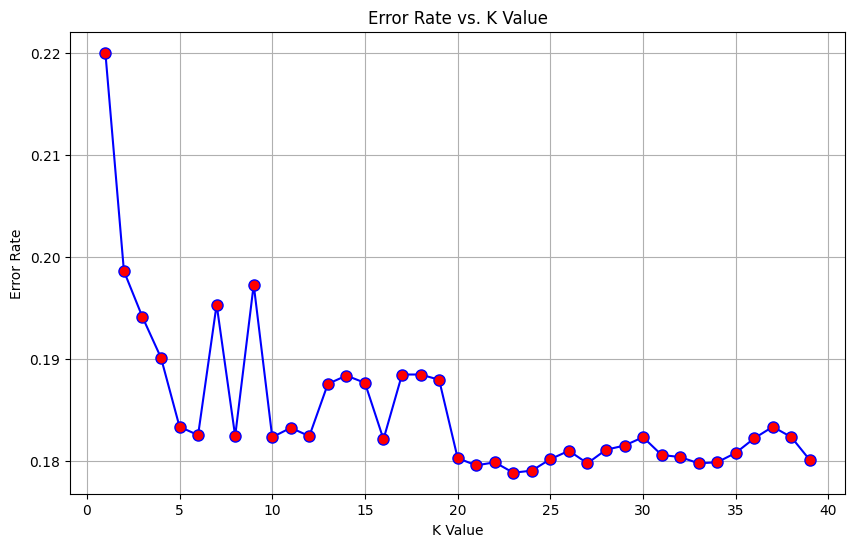

In [42]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


In [43]:
error_rate = []
k_values = list(range(1, 40))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

best_k_error_rate = k_values[np.argmin(error_rate)]
print("Best k based on Error Rate:", best_k_error_rate)

Best k based on Error Rate: 23


In [45]:
# Buat model KNN dengan nilai k terbaik
best_knn = KNeighborsClassifier(n_neighbors=23)
best_knn.fit(X_train, y_train)
y_pred_best_knn = best_knn.predict(X_test)

# Hitung confusion matrix
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Cetak confusion matrix
print("Confusion Matrix:")
print(cm_best_knn)

# Evaluasi tambahan (misalnya, classification report)
classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)
print("\nClassification Report:")
print(classification_rep_best_knn)

Confusion Matrix:
[[6797  634]
 [1113 1225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7431
           1       0.66      0.52      0.58      2338

    accuracy                           0.82      9769
   macro avg       0.76      0.72      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [46]:
# Make predictions on the entire dataset
y_pred_all_knn = knn.predict(x)

# Display predicted values
print('Predicted Values (KNN):')
print(y_pred_all_knn)

# Evaluate the model on the entire dataset
accuracy_knn = accuracy_score(y, y_pred_all_knn)  # Ubah x menjadi y
classification_rep_knn = classification_report(y, y_pred_all_knn)  # Ubah x menjadi y

# Display evaluation metrics
print('Model Evaluation Metrics (KNN):')
print(f'Accuracy: {accuracy_knn:.2f}')
print('Classification Report:')
print(classification_rep_knn)

Predicted Values (KNN):
[0 0 0 ... 0 0 0]
Model Evaluation Metrics (KNN):
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     37155
           1       0.04      0.00      0.00     11687

    accuracy                           0.76     48842
   macro avg       0.40      0.50      0.43     48842
weighted avg       0.59      0.76      0.66     48842



In [47]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[6891,  540],
       [1219, 1119]])

In [48]:
def plot_confusion_matrix(cm, income,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(income))
    plt.xticks(tick_marks, income, rotation=45)
    plt.yticks(tick_marks, income)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[6797  634]
 [1113 1225]]


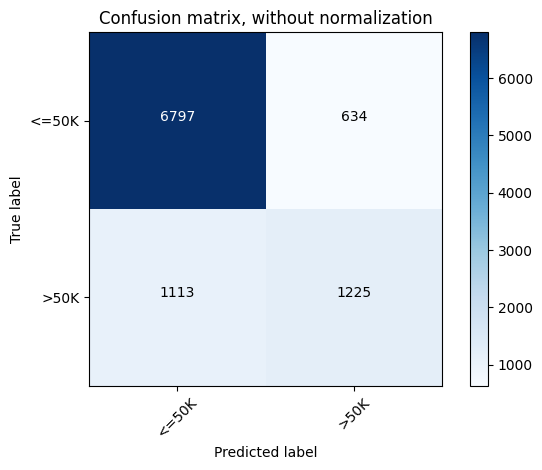

In [49]:
# Misalnya, jika nilai k terbaik adalah 23
best_k = 23
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, income=['<=50K', '>50K'], title='Confusion matrix, without normalization')
plt.show()

# Visualisasi Hasil Algoritma

In [50]:
from sklearn.metrics import roc_curve, auc

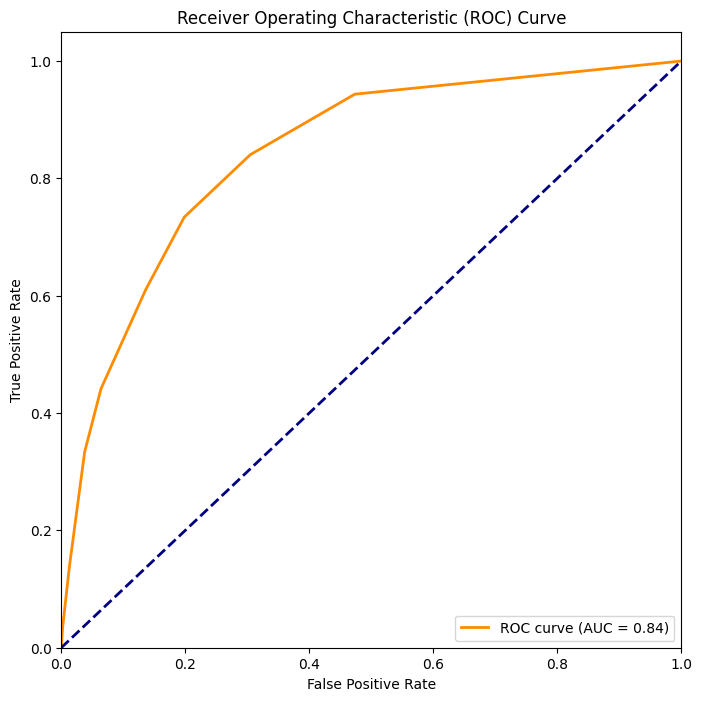

In [51]:
# Misalnya, y_pred_prob adalah probabilitas hasil prediksi model
# Pastikan variabel ini sesuai dengan kebutuhan Anda
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Menghitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Menghitung Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Menampilkan ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

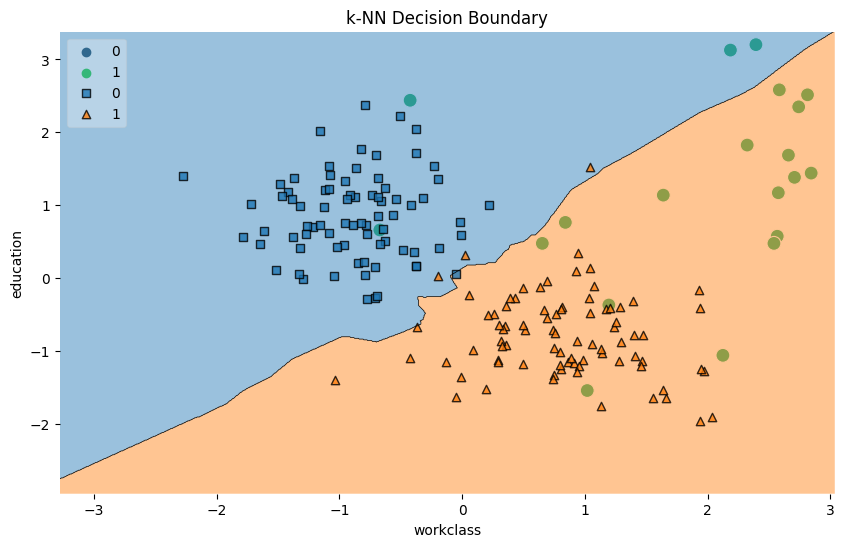

In [52]:
# Buat dataset dengan 2 pusat
centers = 2
n_samples = 200

X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=42, cluster_std=2.5)
df = pd.DataFrame(data=X, columns=['workclass', 'education'])
df['income'] = y

# Pisahkan fitur dan target
X = df[['workclass', 'education']]
y = df['income']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))

# Visualisasi data latih
sns.scatterplot(x='workclass', y='education', hue='income', data=df, palette='viridis', s=100)

# Visualisasi batas keputusan
plot_decision_regions(X_train_scaled, np.array(y_train), clf=knn, legend=2)

plt.title('k-NN Decision Boundary')
plt.xlabel('workclass')
plt.ylabel('education')
plt.show()

# Simpan Model

In [53]:
import pickle

filename = 'adult.sav'
pickle.dump(knn,open(filename,'wb'))